<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Tourism Resource Management: An Analytical Dive</b></div>

Tourism is a multi-billion dollar industry, and managing resources efficiently is crucial for sustainability and visitor satisfaction. This dataset provides a fascinating glimpse into how various factors like temperature, air quality, and noise levels impact tourism resource management. Let's dive into the data and uncover some insights.

If you find this notebook useful, please consider upvoting it.

## Table of Contents
1. [Data Overview](#data-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Correlation Analysis](#correlation-analysis)
5. [Predictive Modeling](#predictive-modeling)
6. [Conclusion and Future Work](#conclusion-and-future-work)

## Data Overview
Let's start by loading the data and taking a quick look at its structure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = '/kaggle/input/tourism-resource-management-dataset/tourism_resource_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,timestamp,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2024-12-01 00:00:00,LOC_003,808,0.907638,19.368864,127,51.506727,summer,0,5.502615,1,0.857819,high,-4.576337,0.582736
1,2024-12-01 01:00:00,LOC_001,948,0.974266,17.404945,37,55.901717,autumn,0,4.736401,0,0.961133,high,-28.314085,20.022820
2,2024-12-01 02:00:00,LOC_003,292,0.321912,16.366819,113,68.533024,winter,1,2.522827,0,0.306956,low,1.329948,5.881103
3,2024-12-01 03:00:00,LOC_003,592,0.811889,20.266316,52,85.301039,autumn,1,2.687745,1,0.701945,medium,-11.921675,20.376535
4,2024-12-01 04:00:00,LOC_001,89,0.936667,15.922471,145,52.258779,summer,1,1.094965,1,0.512834,medium,-6.068825,-4.793058


## Data Preprocessing
Before diving into analysis, let's preprocess the data. We'll check for missing values, convert data types where necessary, and handle any anomalies.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [3]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display data types
df.dtypes

timestamp               datetime64[ns]
location_id                     object
visitor_count                    int64
resource_usage_rate            float64
temperature                    float64
air_quality_index                int64
noise_level                    float64
season                          object
peak_hour_flag                   int64
visitor_satisfaction           float64
sensor_noise_flag                int64
resource_prediction            float64
resource_allocation             object
t_sne_dim1                     float64
t_sne_dim2                     float64
dtype: object

## Exploratory Data Analysis
Let's explore the data using various visualization techniques to understand the distribution and relationships between different features.

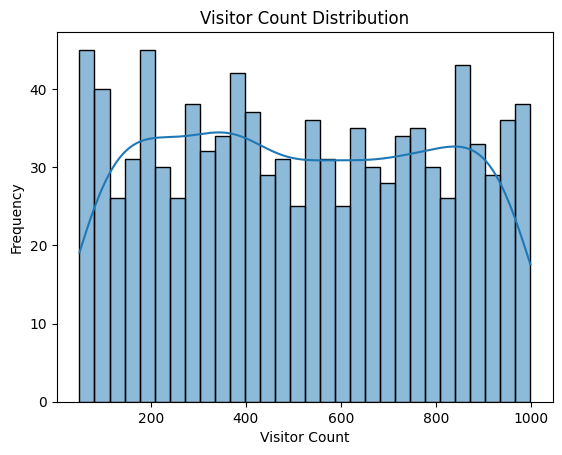

In [4]:
# Visitor count distribution
sns.histplot(df['visitor_count'], bins=30, kde=True)
plt.title('Visitor Count Distribution')
plt.xlabel('Visitor Count')
plt.ylabel('Frequency')
plt.show()

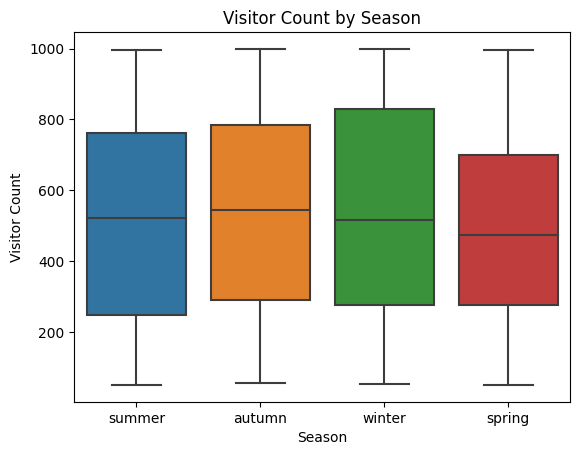

In [5]:
# Visitor count by season
sns.boxplot(x='season', y='visitor_count', data=df)
plt.title('Visitor Count by Season')
plt.xlabel('Season')
plt.ylabel('Visitor Count')
plt.show()

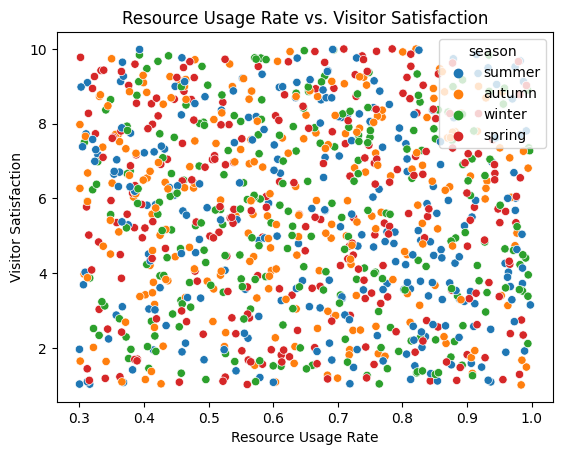

In [6]:
# Resource usage rate vs. visitor satisfaction
sns.scatterplot(x='resource_usage_rate', y='visitor_satisfaction', hue='season', data=df)
plt.title('Resource Usage Rate vs. Visitor Satisfaction')
plt.xlabel('Resource Usage Rate')
plt.ylabel('Visitor Satisfaction')
plt.show()

## Correlation Analysis
Let's examine the correlations between numeric features to identify any strong relationships.

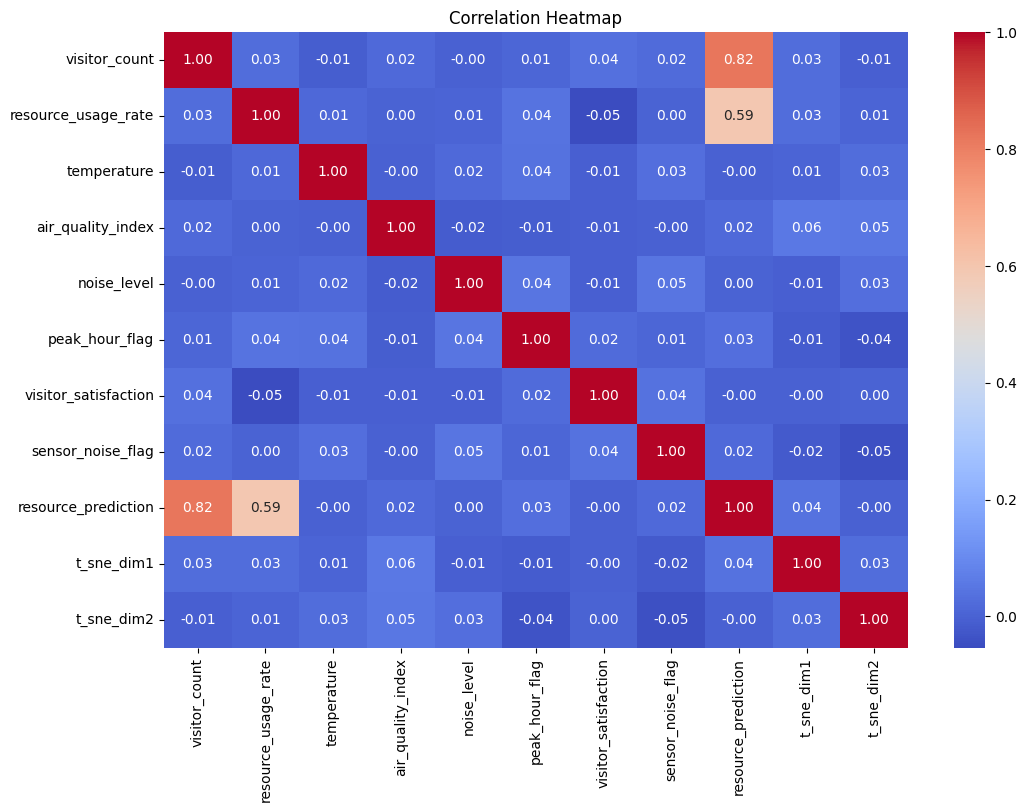

In [7]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Modeling
Given the data, we can attempt to predict the `resource_prediction` using other features. Let's build a simple model and evaluate its performance.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target
X = numeric_df.drop(columns=['resource_prediction'])
y = numeric_df['resource_prediction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.012778005319308639

## Conclusion and Future Work
In this notebook, we explored the tourism resource management dataset, performed exploratory data analysis, and built a predictive model for resource prediction. The Random Forest model provided a baseline performance, but there's room for improvement.

### Future Work
- Experiment with more advanced models like Gradient Boosting or Neural Networks.
- Feature engineering to create new insights from existing data.
- Time series analysis to capture trends over time.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)